In [138]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import classification_report
from yellowbrick.classifier import confusion_matrix

In [139]:
df = pd.read_csv('/Users/toddhendricks/Downloads/2013_01_master.csv')
df.sample(5)

,caseCode,caseName,trialCourt,trialDocket,injReliefOnly,probability,consCase,numCompl,eeocComplAvailable,privPartyComplAvailable,...,sysGoals,sysBenPersEEOC,sysNumCompl,sysNumRecMon,sysDamages,damages_sum,source_damages_sum,cpi,damages_adj,criteria
1826,EE-TN-0068,"EEOC v. LOWE'S HOME CENTERS, INC.",E.D. Tenn.,3:04-cv-00133,no,1.000000,no,2.0,yes,no,...,0,0,0,0,0,60000.000000,amtDefPays,0.942113,63686.636719,0
118,EE-AZ-0033,"EEOC v. CREATIVE NETWORKS, L.L.C.",D. Ariz.,2:05-cv-03032-SMM,no,0.450718,no,2.0,yes,no,...,0,0,0,0,0,NaN,NaN,NaN,NaN,0
1789,EE-TN-0016,EEOC v. BUD DAVIS CADILLAC INC (d/b/a CADILLAC...,W.D. Tenn.,2:02-cv-02731-JPM,no,1.000000,no,1.0,no,no,...,0,0,0,0,0,26000.000000,amtDefPays,0.887603,29292.390625,0
560,EE-GA-0087,EEOC v. POWERS D/B/A McDONALDS'S,M.D. Ga.,1:97-cv-00117-WLS,no,1.000000,no,NaN,no,no,...,0,0,0,0,0,129347.359375,amtReliefEEOC,0.774240,167063.593750,0
2235,EE-WA-0038,"EEOC v. Jerry Chambers Chevrolet, Inc.",W.D. Wash.,2:03-cv-00080-MJP,no,0.450718,no,1.0,yes,yes,...,0,0,0,0,0,70000.000000,amtDefPays,0.911240,76818.421875,0


In [140]:
df.columns.values

array(['caseCode', 'caseName', 'trialCourt', 'trialDocket',
       'injReliefOnly', 'probability', 'consCase', 'numCompl',
       'eeocComplAvailable', 'privPartyComplAvailable',
       'fullDocMonAvailable', 'fullDocInjAvailable', 'judge1Id',
       'judge2Id', 'judge3Id', 'judge4Id', 'judge5Id', 'dateFiled',
       'secondFiling', 'numDocketEntries', 'firstAnswerDate',
       'answerEEOCDate', 'finalResDate', 'finalResType', 'sepPrivResDate',
       'sepPrivResolution', 'appealNotice', 'appealDate',
       'appealRemandDate', 'appealOutcome', 'remandResult', 'eeocOffice1',
       'eeocOffice2', 'regionalAtty1', 'regionalAtty2', 'eeocIntervened',
       'ppComplainants', 'plaintiffPrivCounsel', 'plaintiffProSeCounsel',
       'plaintiffPubIntCounsel', 'plaintiffFirmOrg1', 'plaintiffFirmOrg2',
       'plaintiffFirmOrg3', 'ADABasis', 'ADEABasis', 'EPABasis',
       'titleVIIBasis', 'allegedRaceDiscrim', 'discrimRace',
       'typeRaceOther', 'allegedColorDiscrim', 'allegedNatOrigDiscrim

In [120]:
df['titleVIIBasis'].value_counts(normalize=True)

yes    0.827042
no     0.172958
Name: titleVIIBasis, dtype: float64

In [121]:
civil_rights = df[df['titleVIIBasis'] == 'yes']

In [122]:
civil_rights['finalResType'].value_counts()

consent judgment                                  1087
voluntary dismissal-settlement                     122
none as of 04/22/08                                 71
defendants summary judgment                         55
default judgment                                    33
plaintiffs jury verdict                             32
defendants jury verdict                             27
voluntary dismissal-non-settlement                  21
plaintiffs bench verdict                             6
plaintiffs summary judgment                          5
defendants judgment as a matter of law               3
involuntary dismissal-other                          3
involuntary dismissal-failure to prosecute           1
involuntary dismissal-failure to state a claim       1
judgment on pleadings                                1
Name: finalResType, dtype: int64

In [123]:
def create_target_variable(row):
    val = 'N/A'
    if row == 'defendants summary judgment':
        val = 0
    elif row == 'defendants jury verdict':
        val = 0
    elif row == 'defendants judgment as a matter of law':
        val = 0
    elif row == 'plaintiffs jury verdict':
        val = 1
    elif row == 'plaintiffs bench verdict':
        val = 1
    elif row == 'plaintiffs summary judgment':
        val = 1
#     elif row == 'consent judgment':
#         val = 1
    return val

In [124]:
civil_rights['outcome'] = civil_rights.loc[:,'finalResType'].apply(create_target_variable)

/Users/toddhendricks/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [125]:
civil_rights = civil_rights[civil_rights['outcome'] != 'N/A']
civil_rights.shape

(128, 238)

In [126]:
liability = civil_rights[['retaliationComplaint',
       'retaliationComplaint3p', 'retaliationCooperating',
       'impactAlleged', 'practiceAlleged']]
liability = pd.get_dummies(liability)

In [127]:
eeoc_issues = civil_rights[['hiringIssue', 'testingIssue',
       'trainingIssue', 'medExamIssue', 'payIssue', 'harassmentIssue',
       'disciplineIssue', 'leaveAccomIssue', 'empCondIssue',
       'promotionIssue', 'demotionIssue', 'dischargeIssue', 'otherIssue']]
eeoc_issues = pd.get_dummies(eeoc_issues)

In [128]:
eeoc_relief = civil_rights[['payRelief', 'pecunRelief', 'nonPecunRelief',
       'punitiveRelief', 'liquidatedRelief', 'injunctRelief',
       'declRelief']]
eeoc_relief = pd.get_dummies(eeoc_relief)

In [129]:
private_issues = civil_rights[['s1981PCause', 'otherFedPCause', 'otherFed',
       'stateDiscPCause', 'otherStatePCause']]
private_issues = pd.get_dummies(private_issues)

In [130]:
private_relief = civil_rights[['payPRelief',
       'pecunPRelief', 'nonPecunPRelief', 'punitivePRelief',
       'liquidatedPRelief', 'injunctPRelief', 'declPRelief']]
private_relief = pd.get_dummies(private_relief)

In [131]:
features = pd.concat([liability, eeoc_issues, eeoc_relief, private_issues, private_relief], axis=1)
X = features
y = civil_rights['outcome']
y = y.astype('int')

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [133]:
rf = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state=42)

In [134]:
rf.fit(X_train, y_train)
print("The score for Random Forest is")
print("Training: {:6.2f}%".format(100*rf.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*rf.score(X_test, y_test)))

The score for Random Forest is
Training:  94.12%
Test set:  62.79%


/Users/toddhendricks/miniconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


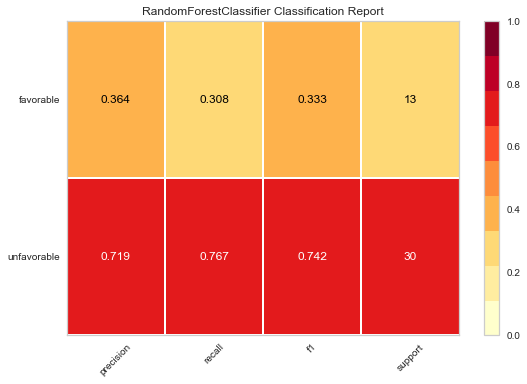

In [135]:
classes = ['unfavorable', 'favorable']
visualizer = classification_report(
    rf, X_train, y_train, X_test, y_test, classes=classes, support=True
)

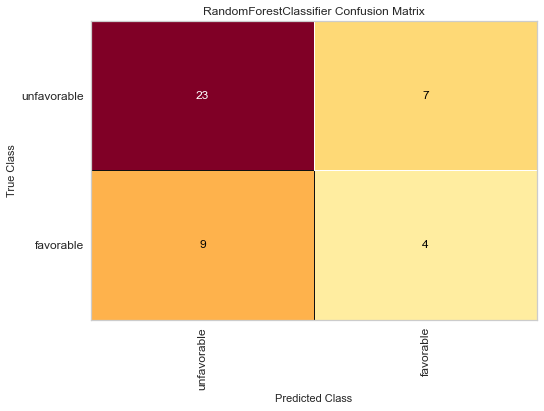

<Figure size 576x396 with 0 Axes>

In [141]:
confusion_matrix(
    rf,
    X_train, y_train, X_test, y_test,
    classes=classes
)
plt.tight_layout()